<a href="https://colab.research.google.com/github/Habiba-Arafa/Machine-learning-Models-From-Scratch/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [15]:
# Load the data
df = pd.read_csv("/content/heart.csv")

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
# check nulls in dataset
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
# Know unique values in target
unique_targets = df['target'].unique()
print(unique_targets)

[1 0]


In [19]:
# Preprocessing steps
df.drop_duplicates(inplace=True)

numerical_columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Handling outliers
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df.loc[df[column] < lower_bound, column] = lower_bound
    df.loc[df[column] > upper_bound, column] = upper_bound

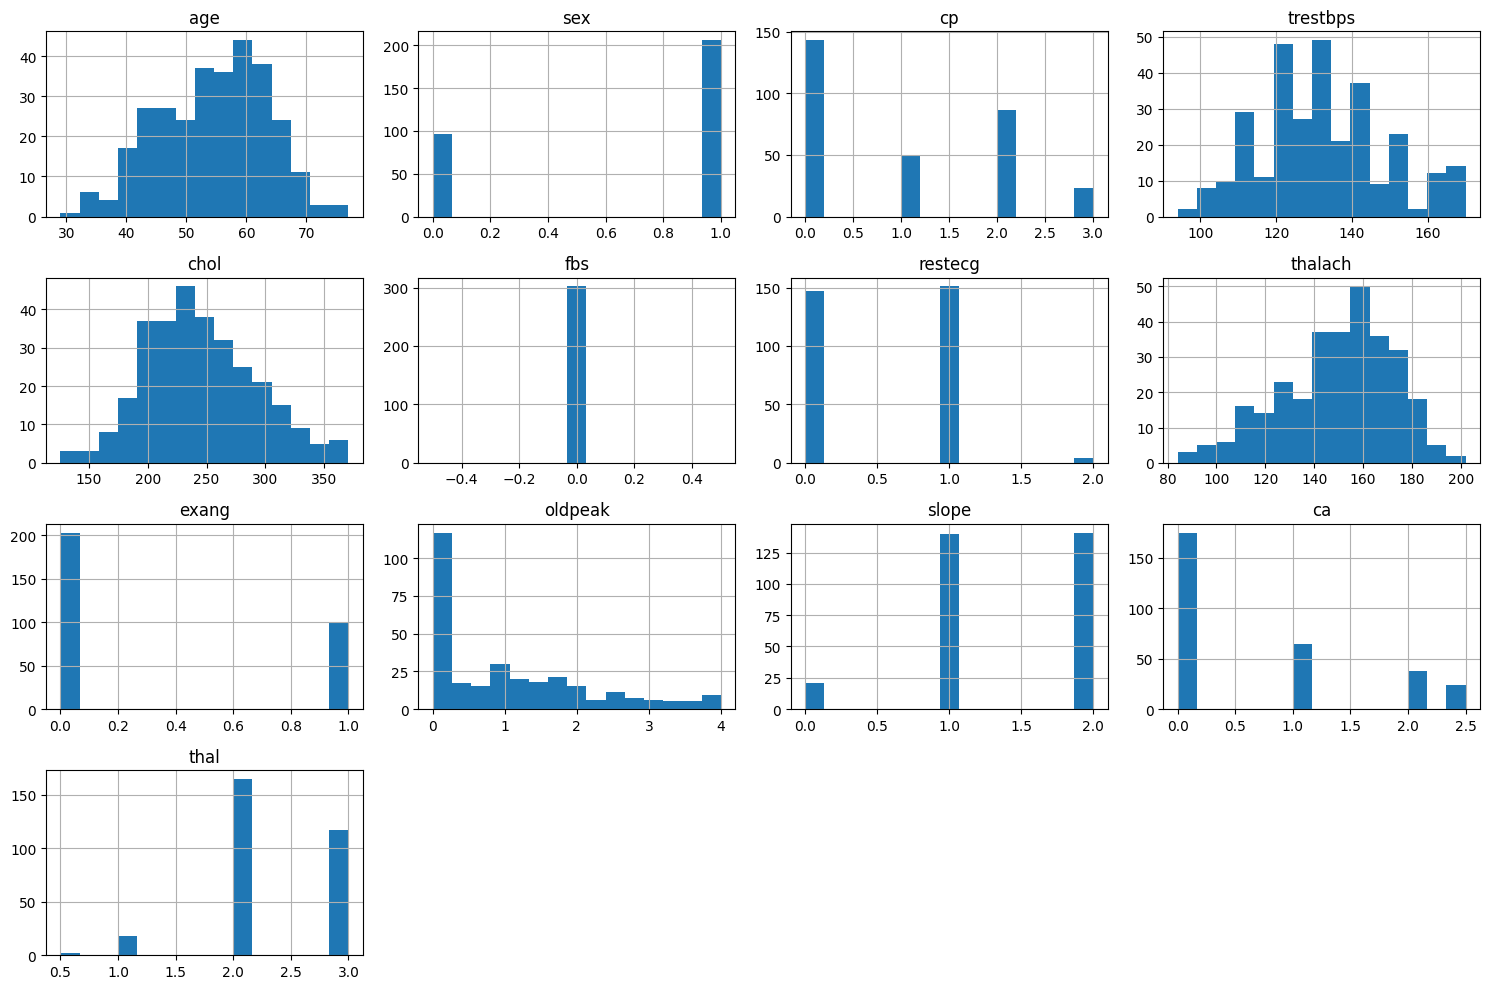

In [20]:
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

df[features].hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

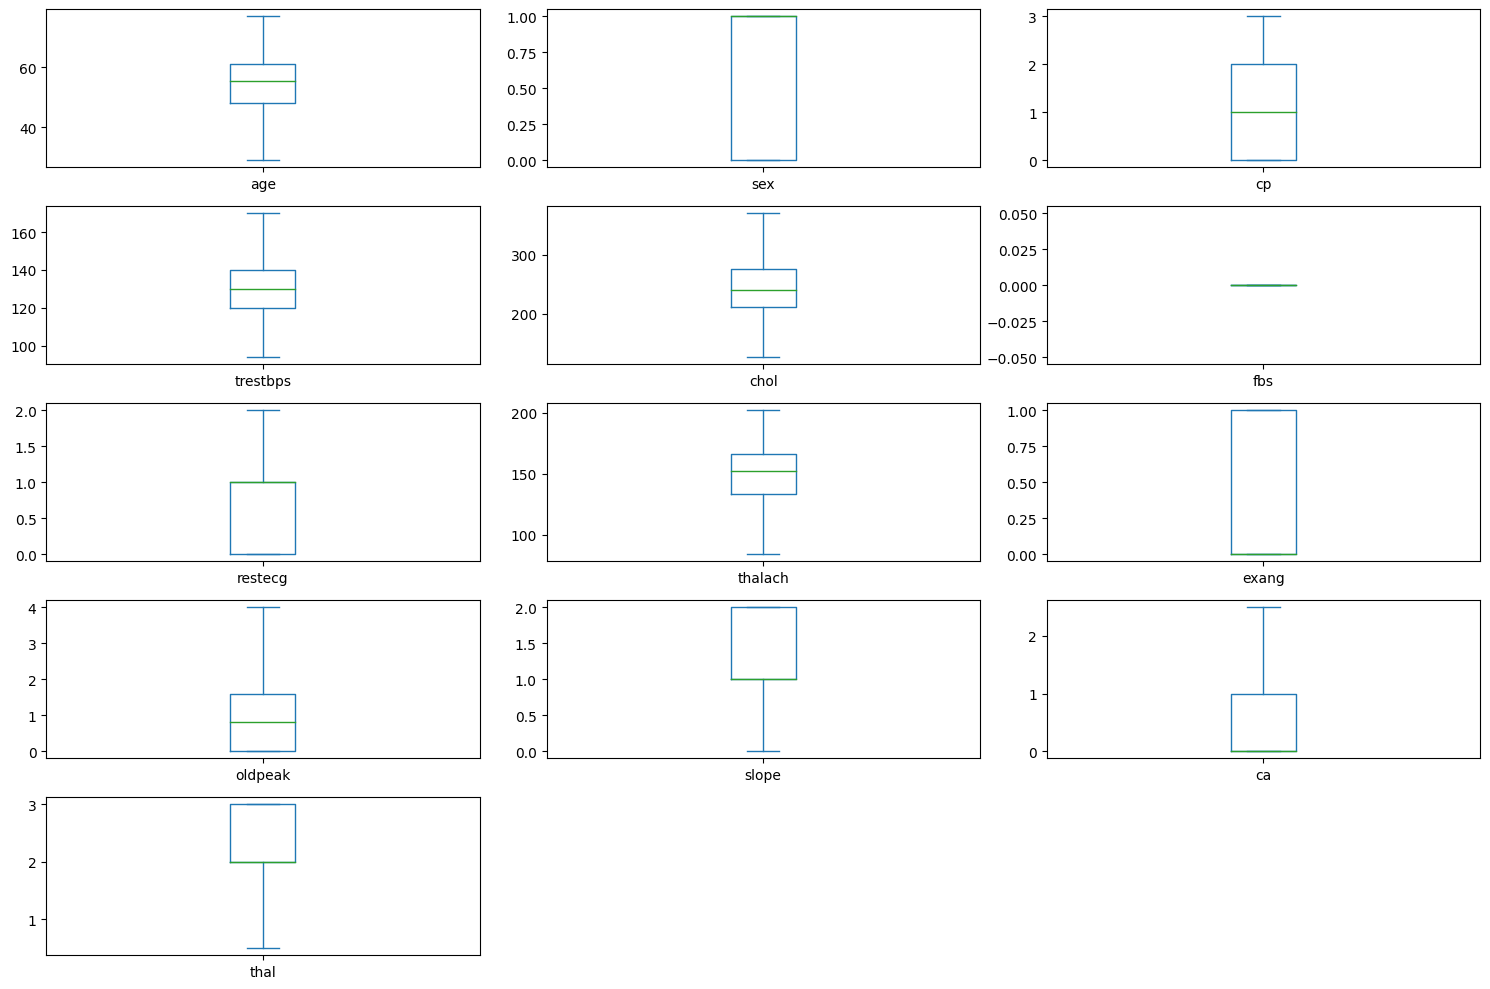

In [21]:
df[features].plot(kind='box', subplots=True, layout=(5, 3), figsize=(15, 10))
plt.tight_layout()
plt.show()


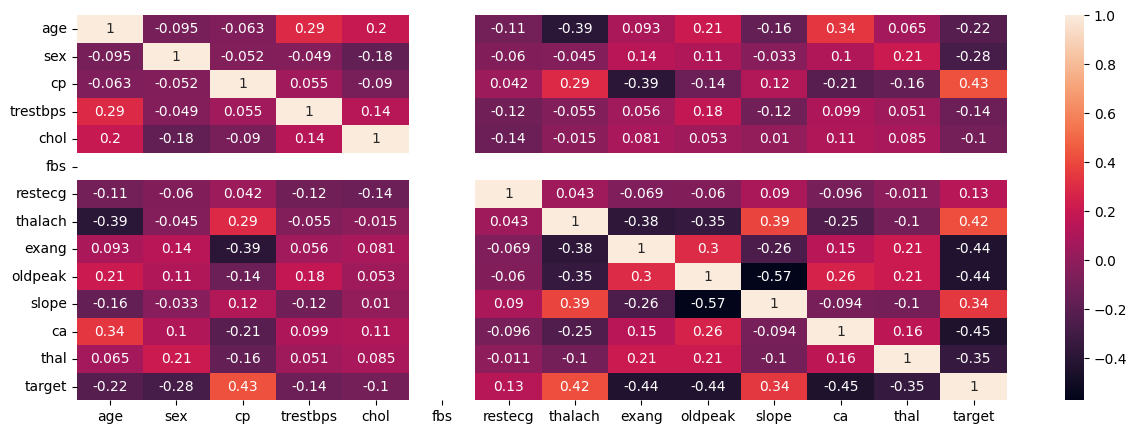

In [22]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [23]:
# Split and scale the data
x = df.drop(columns='target')
y = df['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)


In [24]:
# Transpose X_train and X_test, Reshape Y_train and Y_test
X_train = x_train.T
Y_train = y_train.values.reshape(1, x_train.shape[0])
X_test = x_test.T
Y_test = y_test.values.reshape(1, x_test.shape[0])

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of Y_train: {Y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of Y_test: {Y_test.shape}")

Shape of X_train: (13, 241)
Shape of Y_train: (1, 241)
Shape of X_test: (13, 61)
Shape of Y_test: (1, 61)


In [25]:
# Logistic Regression Model Functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def logistic_regression(X_train, Y, learning_rate, iterations):
    m = X_train.shape[1]
    n = X_train.shape[0]
    W = np.zeros((n, 1))
    B = 0
    cost_list = []

    for i in range(iterations):
        Z = np.dot(W.T, X_train) + B
        A = sigmoid(Z)

        # Cost function
        cost = -(1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))

        # Gradient Descent
        dW = (1 / m) * np.dot(A - Y, X_train.T).T
        dB = (1 / m) * np.sum(A - Y)

        W = W - learning_rate * dW
        B = B - learning_rate * dB

        cost_list.append(cost)
        if i % (iterations / 10) == 0:
            print(f"Cost after {i} iterations: {cost}")

    return W, B, cost_list

def predict(X, W, B):
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    return (A >= 0.5).astype(int)

def evaluate_model(X_test, Y_test, W, B):
    y_pred = predict(X_test, W, B)
    accuracy = (1 - np.sum(np.abs(y_pred - Y_test)) / Y_test.shape[1]) * 100
    print(f"Accuracy of the model: {round(accuracy, 2)}%")
    return accuracy, y_pred

In [26]:
# Train the model
iterations = 100000
learning_rate = 0.0015
W, B, cost_list = logistic_regression(X_train, Y_train, learning_rate, iterations)


Cost after 0 iterations: 0.6931471805599453
Cost after 10000 iterations: 0.337329230745364
Cost after 20000 iterations: 0.331453957455081
Cost after 30000 iterations: 0.33026266446846114
Cost after 40000 iterations: 0.32991162082566833
Cost after 50000 iterations: 0.32979167339106374
Cost after 60000 iterations: 0.32974780805894666
Cost after 70000 iterations: 0.32973120419186175
Cost after 80000 iterations: 0.3297247973225706
Cost after 90000 iterations: 0.32972229619929944


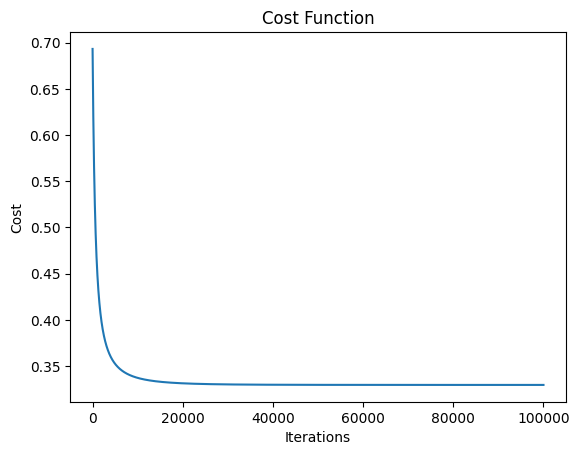

In [27]:
# Plotting cost function
plt.plot(np.arange(iterations), cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function')
plt.show()

In [28]:
# Evaluate the model
accuracy, ypred_test = evaluate_model(X_test, Y_test, W, B)

Accuracy of the model: 80.33%


In [29]:
# Flatten arrays for metric calculations
Y_test = Y_test.ravel()
ypred_test = ypred_test.ravel()


In [30]:
print(f"Precision: {precision_score(Y_test, ypred_test):.2f}")
print(f"Recall: {recall_score(Y_test, ypred_test):.2f}")
print(f"F1-score: {f1_score(Y_test, ypred_test):.2f}")


Precision: 0.77
Recall: 0.91
F1-score: 0.83


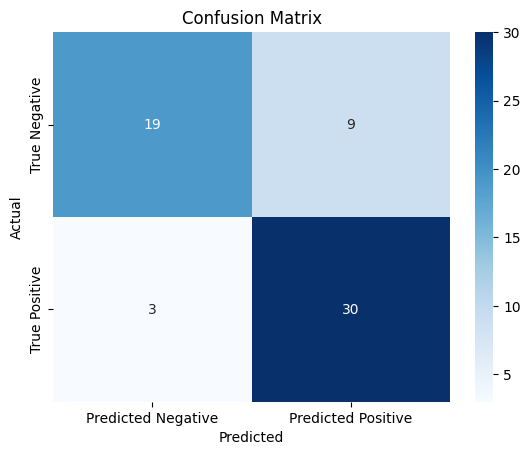

In [31]:
# Display confusion matrix
cm = confusion_matrix(Y_test, ypred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()